In [91]:
import pandas as pd
import numpy as np
from minisom import MiniSom 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [88]:
df = pd.read_csv("./data/HR_data.csv", index_col=0)
df = df.dropna(axis=1, how="any")
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Random shuffle of rows

target_cols = ["Cohort", "Phase", "Round"]
X_cols = list(set(df.columns) - set(target_cols))

X = df[X_cols]
y = df[target_cols]

test_size = 0.0
test_split = len(X) - int(len(X) * test_size)

X_train, y_train = np.array(X[:test_split]), np.array(y[:test_split])

In [89]:
som_shape = (150, 150)

som = MiniSom(som_shape[0], som_shape[1], X_train.shape[1], sigma=10, learning_rate=0.5)
som.pca_weights_init(X_train)
som.train_random(X_train, 5000, verbose=True);

c:\Users\eskeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 391.07981088023587


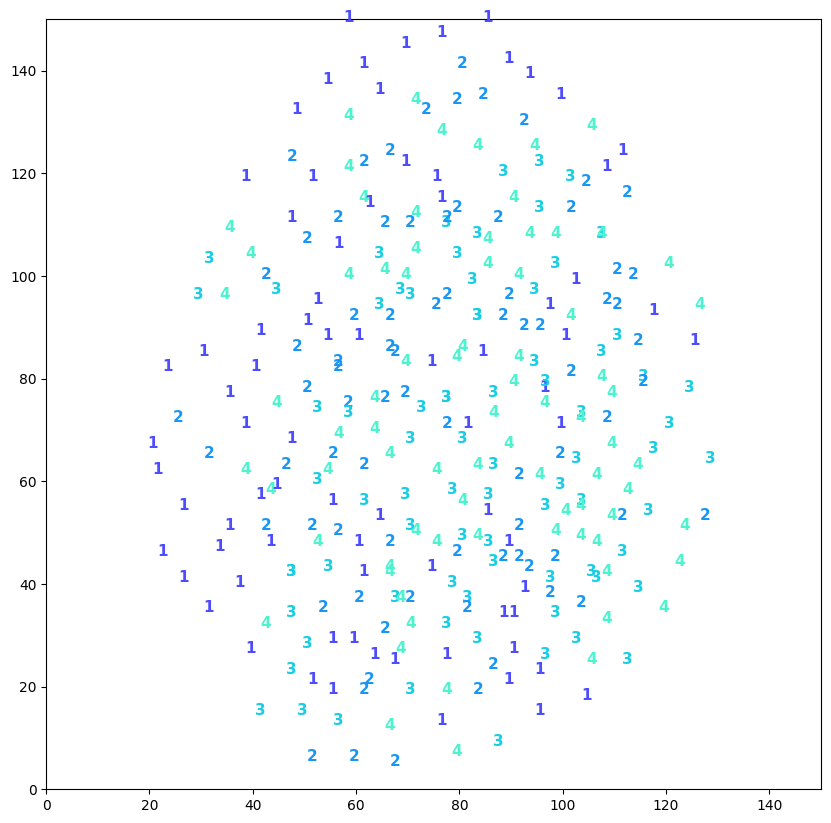

In [90]:
plt.figure(figsize=(10, 10))
for x, target in zip(X_train, y_train):  # scatterplot
    str_target = str(target[2][-1])
    w = som.winner(x)
    xval = w[0]+.5 #+0.6*np.random.rand(1)-0.3
    yval = w[1]+.5 #+0.6*np.random.rand(1)-0.3
    plt.text(xval,  yval,  str_target,
              color=plt.cm.rainbow(int(str_target) / 10.), fontdict={'weight': 'bold',  'size': 11})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

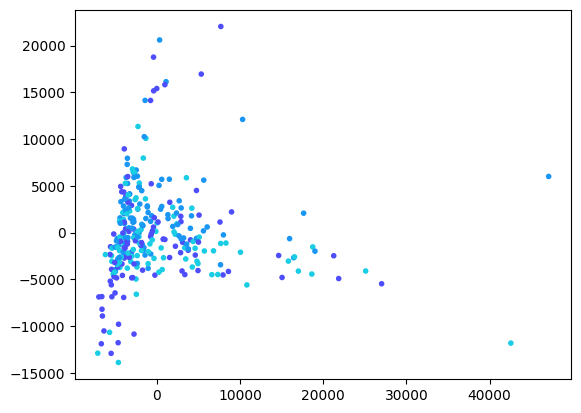

In [103]:
pca = PCA(n_components=2)
comps = pca.fit_transform(X_train)
classes = np.array([int(target[-1]) for target in y_train[:,1]])
cmap = plt.cm.rainbow(classes / 10.)
plt.scatter(comps[:,0], comps[:,1], marker='.', c = cmap)